In [1]:
import rescomp as rc
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

# Fourier Computer
Use a reservoir whoes internal states are sinusoidal.

In [2]:
class FourierComp(rc.ResComp):
    
    def res_f(self, t, r, u):
        N = len(r)
        sinN = (N - 1) // 2
        rprime = np.zeros(len(r))
        N
        # First entry is constant
        for i in range(1, sinN):
            rprime[i] = i*np.cos(i*t)
        for i in range(sinN, N):
            k = i - sinN + 1
            rprime[i] = -k*np.sin(k*t)
        return rprime
    
    def res_pred_f(self, t, r):
        return self.res_f(t, r, 0)

    def initial_condition(self, u):
        r0 = np.zeros(self.res_sz)
        r0[0] = 1.0
        return r0
        

        
    

In [3]:
fcomp = FourierComp(res_sz=1000)

In [4]:
tr, Utr, ts, Uts = rc.train_test_orbit("lorenz")

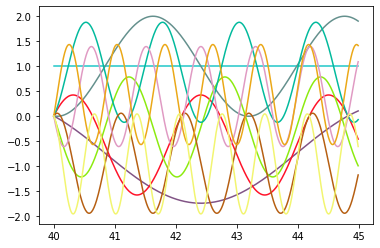

In [5]:
r0 = np.zeros(fcomp.res_sz)
r0[0] = 1.0
R = fcomp.internal_state_response(tr, Utr, r0)
col = rc.plot2d(tr, R[:, :10])

In [6]:
fcomp.train(tr, Utr)

In [7]:
pre = fcomp.predict(ts, fcomp.r0)

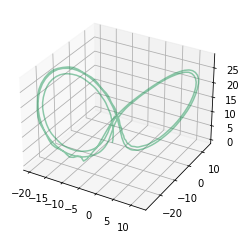

array([0.11988452, 0.5956176 , 0.34724436])

In [8]:
rc.plot3d(pre)

In [9]:
rc.system_fit_error(tr, pre, "lorenz")

663.992526775809

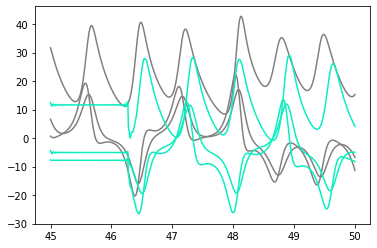

In [10]:
plt.plot(ts, Uts, c="gray")
plt.plot(ts, pre, c=np.array([0.03759941, 0.93456199, 0.75462194]))
plt.show()

In [11]:
t = np.arange(45, 55, 0.01)
randpre = fcomp.predict(t, Utr[0])

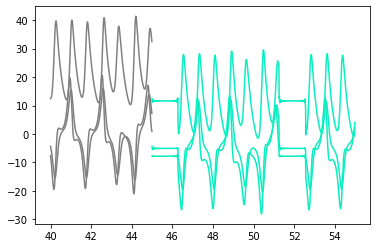

In [12]:
plt.plot(tr, Utr, c="gray")
plt.plot(t, randpre, c=np.array([0.03759941, 0.93456199, 0.75462194]))
plt.show()

We learn that the fourier computer perfectly projects on to the signal but does not predict, instead it reads out the learned signal over and over again as it comes in and out of phase. Past the training signal, the linear combination of $\sin(ax)$ and $\cos(ax)$ look nothing like the lorenz equation.

This is the reason you have to learn a "system", or the laws that govern change in state. If you simply project onto a functional basis, the linear combination of functions are a fit to your training data, but not a fit to the laws governing the training data.

We might pose the problem like this:
Assume $\mathbf{x}_1(t), \mathbf{x}_2(t), ... \mathbf{x}_k(t)$ are solutions to
$$ \mathbf{x}'(t) = F\big(\mathbf{x}(t), t \big) $$
where $F$ is unknown. How can we approximate $F$?
    

What if $F$ is autonomous and linear, that is $\mathbf{x}'(t) = A \mathbf{x}(t)$.

Then if $X(t) = [\mathbf{x}_1(t), \mathbf{x}_2(t), \cdots, \mathbf{x}_k(t)]$, $A = X'(t)X^{-1}(t)$ which requires that $X(t)$ is square and the solutions are linearly independent.

If $F$ is autonomous, then
$$F(\mathbf{x}_i) = F(\mathbf{x}_j) + DF(\mathbf{x}_j) \big( \mathbf{x}_i - \mathbf{x}_j \big) + \frac{1}{2}\big( \mathbf{x}_i - \mathbf{x}_j \big)^T  D^2F(\mathbf{x}_j) \big( \mathbf{x}_i - \mathbf{x}_j \big)$$
Since $F(\mathbf{x}) = \mathbf{x}'$,

$$ \mathbf{x}_i' \approx \mathbf{x}_j' + DF(\mathbf{x}_j) \big( \mathbf{x}_i - \mathbf{x}_j \big)$$

$$\mathbf{x}_i' - \mathbf{x}_j' =  DF(\mathbf{x}_j) \big( \mathbf{x}_i - \mathbf{x}_j \big)$$

Then if 
$$\hat{X} = [\mathbf{x}_1 - \mathbf{x}_2, \mathbf{x}_1 - \mathbf{x}_3, \cdots \mathbf{x}_1 - \mathbf{x}_k]$$ 

We can solve for $DF$ for a specific $\mathbf{x}_i$, but not for arbitrary $\mathbf{x}$